## Problem Statement


Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.

More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of
the data which is simpler, it is more complex than MNIST because of the distractors.
The Street View House Numbers (SVHN) Dataset

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

### The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goals of this project are as follows:

● Understand the basic Image Classification pipeline and the data-driven approach
 
(train/predict stages)

● Data fetching and understand the train/val/test splits. (5 points)

● Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (10 points)

● Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (10 points)

● Implement batch normalization for training the neural network (5 points)

● Print the classification accuracy metrics (5 points)


In [2]:
## Load all required libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from keras.models import load_model, Sequential
from keras.layers import Dense, Reshape, BatchNormalization, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelBinarizer
from keras.layers import BatchNormalization, Dropout

Using TensorFlow backend.


In [3]:
f = h5py.File('SVHN_single_grey1.h5','r')

In [4]:
# Load the training, test and validation set
X_train = f['X_train'][:]
y_train = f['y_train'][:]
X_test = f['X_test'][:]
y_test = f['y_test'][:]
X_val = f['X_val'][:]
y_val = f['y_val'][:]



print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


In [5]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(42000, 32, 32)
(18000, 32, 32)
(60000, 32, 32)
(42000,)
(18000,)
(60000,)


The training set has 42000 records of size 32 X 32

The test set has 18000 records of size 32 X 32

The validation set has 60000 records of size 32 X 32

In [6]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [7]:
y_train[0]

2

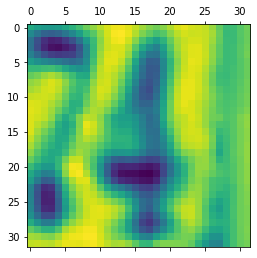

In [8]:
# Plot a random image and its label

plt.matshow(X_train[13529])



In [9]:
y_train[13529]

4

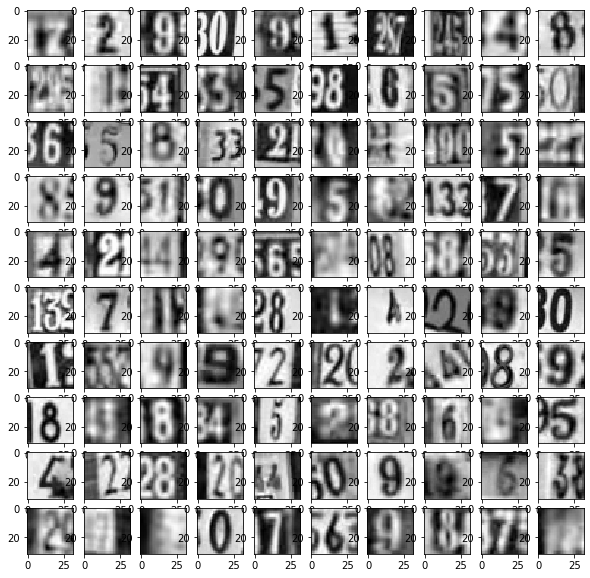

In [10]:
fig = plt.figure(figsize=(10,10))
columns = 10
rows = 10
for i in range(1, columns * rows + 1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

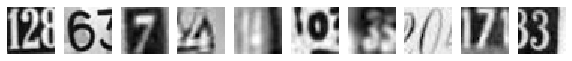


Tags attached images are as follows : 
 [6 7 4 4 0 3 0 7 3]


In [11]:
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.axis('off')
plt.show()
print("\nTags attached images are as follows : \n", y_train[1:10])

In [89]:
# Convert train and test images into 'float64' type

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

In [90]:
# Convert train and test labels into 'int64' type

y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

In [91]:
# Normalize the images data

print('Min: {}, Max: {}'.format(X_train.min(), X_train.max()))

X_train /= 255.0
X_test /= 255.0

Min: 0.0, Max: 254.97450256347656


In [92]:
# One-hot encoding of train and test labels

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [93]:
# Split train data into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.15, random_state=22)

In [94]:
y_val.shape

(6300, 10)

### Adding layers [layers and activations]
Keras layers can be added to the model

Adding layers are like stacking lego blocks one by one

It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added

Now build the Sequential Model and add layers into it

In [95]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation
from keras import optimizers
from keras import initializers


Let us build a neural network with following architecture

Input layer

First Hidden Layer with 400 neurons and activation function as ReLU

Second Hidden Layer with 200 neurons and activation function as ReLU

Third Hidden Layer with 100 neurons and activation function as ReLU

Fourth Hidden Layer with 25 neurons and activation function as ReLU

The output layer with Softmax activation function

The optimizer used is the SGD Optimizer with learning rate 0.01




In [96]:
tf.keras.backend.clear_session()

This is a multi class classification problem. There are a total of 10 class

One for each digit 0-9. Digit '1' has label 1, '9' has label 9 and '0' has label 10

We need to encode it as one hot encoding with number of classes as 10

Expected output should look like

In [97]:
print("The first 5 rows are: ",y_train[0:5])

The first 5 rows are:  [[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]


In [98]:
# Initialize the sequential model
model = Sequential()

# Reshape from 2D to 1D i.e. from 32X32 into 1024
model.add(Reshape((1024,), input_shape=((32,32,))))

# First Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu'))

# Second Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu'))

# Third Hidden Layer with 30 neurons and activation function as ReLU
model.add(Dense(30, activation='relu'))

# The output layer with Softmax activation function
model.add(Dense(10, activation='softmax'))

Using Batch Normalization in each layer

Adding weight initialization in each layer

Adding Dense layers with 0.2 as dropout factor

Since this is a multi class classification problem, the loss function suitable is the 
categorical crossentropy We shall use the accuracy as the metrics

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                51250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
Total params: 55,640
Trainable params: 55,640
Non-trainable params: 0
_________________________________________________________________


In [100]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [102]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 20, verbose = 1)

Epoch 1/20
35700/35700 [==============================] - 1s 41us/step - loss: 1.5659 - accuracy: 0.4771
Epoch 2/20
35700/35700 [==============================] - 1s 37us/step - loss: 1.4199 - accuracy: 0.5348
Epoch 3/20
35700/35700 [==============================] - 1s 37us/step - loss: 1.3242 - accuracy: 0.5729
Epoch 4/20
35700/35700 [==============================] - 1s 37us/step - loss: 1.2477 - accuracy: 0.6004
Epoch 5/20
35700/35700 [==============================] - 1s 37us/step - loss: 1.1842 - accuracy: 0.6234
Epoch 6/20
35700/35700 [==============================] - 1s 38us/step - loss: 1.1327 - accuracy: 0.6441
Epoch 7/20
35700/35700 [==============================] - 1s 39us/step - loss: 1.0876 - accuracy: 0.6591
Epoch 8/20
35700/35700 [==============================] - 1s 39us/step - loss: 1.0517 - accuracy: 0.6716 0s - loss: 1
Epoch 9/20
35700/35700 [==============================] - 2s 43us/step - loss: 1.0241 - accuracy: 0.6792
Epoch 10/20
35700/35700 [=================

In [103]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 31us/step


In [104]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7164999842643738


### In the above Neural network model, adding Weight Initialization layer after the input layer and repeat the steps

In [105]:
tf.keras.backend.clear_session()

# Initialize the sequential model
model = Sequential()

# Reshape from 2D to 1D i.e. from 32X32 into 1024
model.add(Reshape((1024,), input_shape=((32,32,))))

# First Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))

# Second Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))

# Third Hidden Layer with 30 neurons and activation function as ReLU
model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))

# The output layer with Softmax activation function
model.add(Dense(10, activation='softmax'))

In [109]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [110]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test), shuffle='batch')

Train on 35700 samples, validate on 18000 samples
Epoch 1/15
35700/35700 [==============================] - 2s 63us/step - loss: 1.7491 - accuracy: 0.4019 - val_loss: 1.5504 - val_accuracy: 0.4995
Epoch 2/15
35700/35700 [==============================] - 2s 61us/step - loss: 1.5195 - accuracy: 0.5008 - val_loss: 1.3954 - val_accuracy: 0.5592
Epoch 3/15
35700/35700 [==============================] - 2s 61us/step - loss: 1.3697 - accuracy: 0.5608 - val_loss: 1.3758 - val_accuracy: 0.5623
Epoch 4/15
35700/35700 [==============================] - 2s 61us/step - loss: 1.2738 - accuracy: 0.5977 - val_loss: 1.2595 - val_accuracy: 0.5989
Epoch 5/15
35700/35700 [==============================] - 3s 75us/step - loss: 1.2048 - accuracy: 0.6220 - val_loss: 1.2476 - val_accuracy: 0.6031
Epoch 6/15
35700/35700 [==============================] - 2s 64us/step - loss: 1.1470 - accuracy: 0.6400 - val_loss: 1.2982 - val_accuracy: 0.5904
Epoch 7/15
35700/35700 [==============================] - 2s 60us/st

In [111]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 0s 22us/step


In [112]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7099444270133972


### In the above Neural network model add Batch Normalization layer after the input layer and repeat the steps

In [113]:
tf.keras.backend.clear_session()

# Initialize the sequential model
model = Sequential()

# Reshape from 2D to 1D i.e. from 32X32 into 1024
model.add(Reshape((1024,), input_shape=((32,32,))))

# Batch Normalization
model.add(BatchNormalization())

# First Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu'))

# Batch Normalization
model.add(BatchNormalization())

# Second Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu'))

# Batch Normalization
model.add(BatchNormalization())

# Third Hidden Layer with 30 neurons and activation function as ReLU
model.add(Dense(30, activation='relu'))

# The output layer with Softmax activation function
model.add(Dense(10, activation='softmax'))

In [115]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [116]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test), shuffle='batch')

Train on 35700 samples, validate on 18000 samples
Epoch 1/15
35700/35700 [==============================] - 3s 97us/step - loss: 1.9645 - accuracy: 0.3103 - val_loss: 1.5144 - val_accuracy: 0.5146
Epoch 2/15
35700/35700 [==============================] - 3s 84us/step - loss: 1.4460 - accuracy: 0.5255 - val_loss: 1.2403 - val_accuracy: 0.6125
Epoch 3/15
35700/35700 [==============================] - 3s 84us/step - loss: 1.2601 - accuracy: 0.5940 - val_loss: 1.1160 - val_accuracy: 0.6598
Epoch 4/15
35700/35700 [==============================] - 3s 88us/step - loss: 1.1523 - accuracy: 0.6310 - val_loss: 1.0217 - val_accuracy: 0.6869
Epoch 5/15
35700/35700 [==============================] - 3s 87us/step - loss: 1.0849 - accuracy: 0.6517 - val_loss: 0.9529 - val_accuracy: 0.7064
Epoch 6/15
35700/35700 [==============================] - 3s 91us/step - loss: 1.0295 - accuracy: 0.6743 - val_loss: 0.9373 - val_accuracy: 0.7173
Epoch 7/15
35700/35700 [==============================] - 3s 87us/st

In [117]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 37us/step


In [118]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7582777738571167


#### The model performance before adding batch normalization was very poor, On adding the batch normalization the performance has improved significantly

#### Let us initialize weights on top of batch normalization

In [121]:
tf.keras.backend.clear_session()

# Initialize the sequential model
model = Sequential()

# Reshape from 2D to 1D i.e. from 32X32 into 1024
model.add(Reshape((1024,), input_shape=((32,32,))))
model.add(BatchNormalization())


# First Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

# Second Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

# Third Hidden Layer with 30 neurons and activation function as ReLU
model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

# The output layer with Softmax activation function
model.add(Dense(10, activation='softmax'))

In [122]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [123]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test), shuffle='batch')

Train on 35700 samples, validate on 18000 samples
Epoch 1/15
35700/35700 [==============================] - 4s 112us/step - loss: 2.0642 - accuracy: 0.2813 - val_loss: 1.6193 - val_accuracy: 0.4831
Epoch 2/15
35700/35700 [==============================] - 3s 96us/step - loss: 1.5440 - accuracy: 0.4986 - val_loss: 1.2925 - val_accuracy: 0.6074
Epoch 3/15
35700/35700 [==============================] - 3s 96us/step - loss: 1.3369 - accuracy: 0.5728 - val_loss: 1.1418 - val_accuracy: 0.6561
Epoch 4/15
35700/35700 [==============================] - 3s 92us/step - loss: 1.2302 - accuracy: 0.6068 - val_loss: 1.0740 - val_accuracy: 0.6758
Epoch 5/15
35700/35700 [==============================] - 3s 91us/step - loss: 1.1595 - accuracy: 0.6321 - val_loss: 1.0096 - val_accuracy: 0.6924
Epoch 6/15
35700/35700 [==============================] - 3s 92us/step - loss: 1.1036 - accuracy: 0.6500 - val_loss: 0.9434 - val_accuracy: 0.7192
Epoch 7/15
35700/35700 [==============================] - 3s 91us/s

In [124]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 36us/step


In [126]:
print('Test accuracy: ', results[1])

Test accuracy:  0.754277765750885


We can see that, on initializing the weights the training accuracy is about 73.04% and the test accuracy is about 75.4%

### Let us build a neural network with following architecture

Input layer

First Hidden Layer with 100 neurons and activation function as ReLU

Second Hidden Layer with 75 neurons and activation function as ReLU

Third Hidden Layer with 50 neurons and activation function as ReLU

The output layer with Softmax activation function

The optimizer used is the SGD Optimizer with learning rate 0.01

Using Batch Normalization in each layer

Adding weight initialization in each layer

Adding Dense layers with 0.4 as dropout factor

Since this is a multi class classification problem, the loss function suitable is the categorical crossentropy We shall use the accuracy as the metrics

In [130]:
tf.keras.backend.clear_session()

# Initialize the sequential model
model = Sequential()

# Reshape from 2D to 1D i.e. from 32X32 into 1024
model.add(Reshape((1024,), input_shape=((32,32,))))
model.add(BatchNormalization())


# First Hidden Layer with 100 neurons and activation function as ReLU
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

# Second Hidden Layer with 75 neurons and activation function as ReLU
model.add(Dense(75, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Third Hidden Layer with 50 neurons and activation function as ReLU
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# The output layer with Softmax activation function
model.add(Dense(10, activation='softmax'))

In [131]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [132]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test), shuffle='batch')

Train on 35700 samples, validate on 18000 samples
Epoch 1/15
35700/35700 [==============================] - 5s 134us/step - loss: 2.3582 - accuracy: 0.1846 - val_loss: 1.7685 - val_accuracy: 0.4426
Epoch 2/15
35700/35700 [==============================] - 4s 119us/step - loss: 1.8696 - accuracy: 0.3292 - val_loss: 1.5158 - val_accuracy: 0.5560
Epoch 3/15
35700/35700 [==============================] - 4s 111us/step - loss: 1.6893 - accuracy: 0.4099 - val_loss: 1.3599 - val_accuracy: 0.6031
Epoch 4/15
35700/35700 [==============================] - 4s 112us/step - loss: 1.5767 - accuracy: 0.4622 - val_loss: 1.2210 - val_accuracy: 0.6520
Epoch 5/15
35700/35700 [==============================] - 4s 111us/step - loss: 1.4874 - accuracy: 0.5006 - val_loss: 1.1712 - val_accuracy: 0.6601
Epoch 6/15
35700/35700 [==============================] - 4s 114us/step - loss: 1.4201 - accuracy: 0.5319 - val_loss: 1.0743 - val_accuracy: 0.6834
Epoch 7/15
35700/35700 [==============================] - 4s 1

In [133]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 39us/step


In [134]:
print('Test accuracy: ', results[1])

Test accuracy:  0.770111083984375


#### Test Report

In [135]:
y_pred = model.predict_classes(X_test)
y_actual = f['y_test']
accuracy = model.evaluate(X_test,y_test)

18000/18000 [==============================] - 1s 36us/step


In [136]:
print("Model Accuracy is {}%".format(round(accuracy[1]*100,2)))
print("Classification Metric For Test Data:")
print(classification_report(y_actual, y_pred))

Model Accuracy is 77.01%
Classification Metric For Test Data:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1814
           1       0.73      0.83      0.77      1828
           2       0.85      0.77      0.81      1803
           3       0.73      0.71      0.72      1719
           4       0.83      0.81      0.82      1812
           5       0.76      0.73      0.74      1768
           6       0.79      0.74      0.77      1832
           7       0.78      0.83      0.80      1808
           8       0.68      0.73      0.71      1812
           9       0.81      0.72      0.76      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.77     18000
weighted avg       0.77      0.77      0.77     18000



### Summary
The model with characteristics
 - Input layer
 - First Hidden Layer with 100 neurons and activation function as ReLU
 - Second Hidden Layer with 75 neurons and activation function as ReLU
 - Third Hidden Layer with 50 neurons and activation function as ReLU
 - The output layer with Softmax activation function
 - The optimizer used is the SGD Optimizer with learning rate 0.01
 - Using Batch Normalization in each layer
 - Adding weight initialization in each layer
 - Since this is a multi class classification problem, the loss function suitable is the categorical crossentropy We shall use the accuracy as the metrics.
According to the metrics and the reports we see that,
The training accuracy is 65%
The testing accuracy is 77 %

The model summary is as follows

In [144]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               102500    
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 75)                7575      
_________________________________________________________________
batch_normalization_3 (Batch (None, 75)                300       
_________________________________________________________________
dropout_1 (Dropout)          (None, 75)               

Before applying batch normalization the accuracy was very poor ~10%. After applying batch normalization, the accuracy increased to more than 75%

Adding Droput layer, the model accuracy reduced by ~2%.

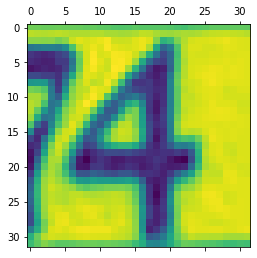

In [145]:
plt.matshow(X_test[2200])

In [146]:
yp = model.predict(X_test)

In [147]:
np.argmax(yp[2200])

4

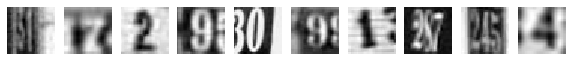


Tags attached images are as follows : 
 [7 2 9 0 9 1 8 4 4]


In [12]:
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.axis('off')
plt.show()
print("\nTags attached images are as follows : \n", y_test[1:10])